<a href="https://colab.research.google.com/github/oprostep/2023-spring/blob/main/Pima_indian_diabete_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
# start by importing all possibly useful libraries
# source : https://www.kaggle.com/code/mehmettuzcu/diabetes-prediction-with-logistic-regression

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score,
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

In [4]:
# import auto-mpg.csv

targetUrl = "https://raw.githubusercontent.com/oprostep/2023-spring/main/diabetes.csv"

df = pd.read_csv(targetUrl, sep=',')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


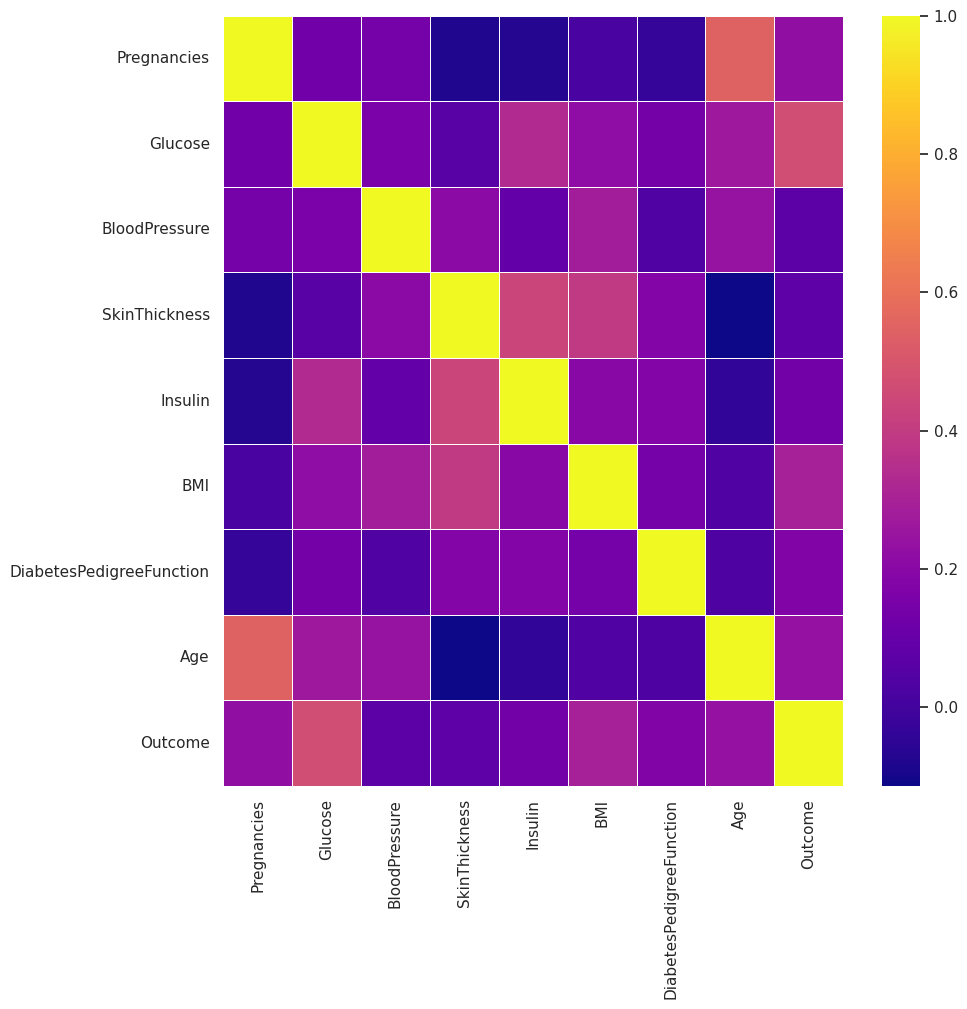

In [9]:
corr = df.corr()

sns.set(rc={'figure.figsize': (10, 10)})
sns.heatmap(corr, linewidth = 0.7, cmap = "plasma")
plt.show()

In [37]:
outcome=df['Outcome']
data=df[df.columns[:8]]
train,test=train_test_split(df,test_size=0.25,random_state=0,stratify=df['Outcome'])
train_X=train[train.columns[:8]]
test_X=test[test.columns[:8]]
train_y=train['Outcome']
test_y=test['Outcome']

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.78125
AUC: 0.8714029850746269


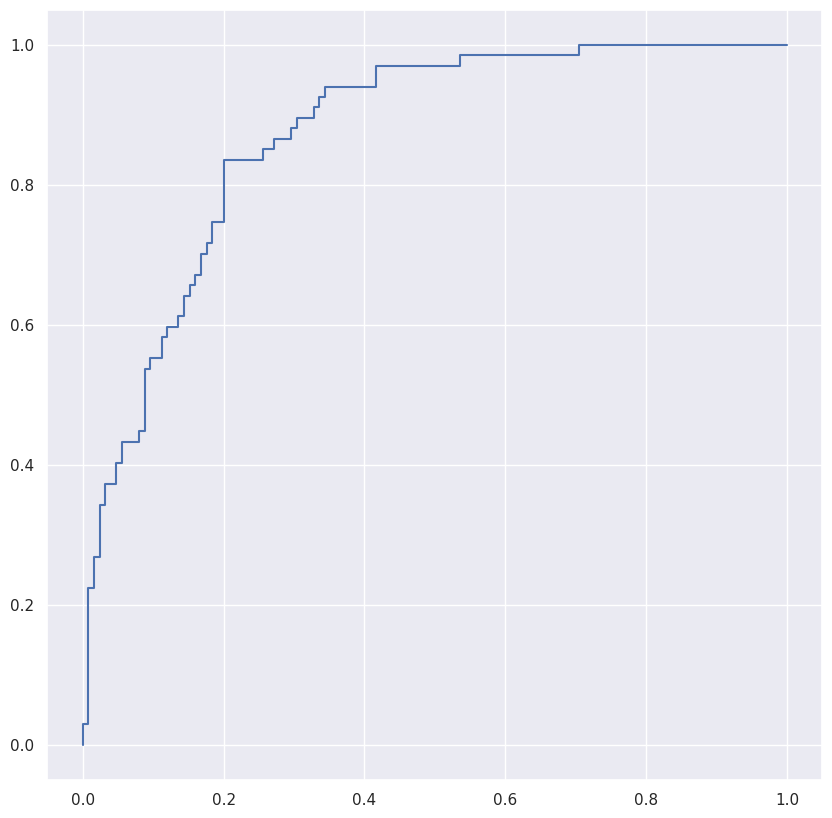

In [46]:
model = LogisticRegression()
model.fit(train_X,train_y)
pred = model.predict(test_X)
accuracy = metrics.accuracy_score(pred,test_y)
print("Accuracy:",accuracy)

y_pred_prob = model.predict_proba(test_X)[:,1]
fpr, tpr, thresholds = roc_curve(test_y, y_pred_prob)
roc_auc = auc(fpr, tpr)
precision, recall, th = precision_recall_curve(test_y, y_pred_prob)

plt.plot(fpr, tpr)
print("AUC:",roc_auc)